
We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import pandas_datareader.data as dr
from datetime import datetime

In [3]:
import yfinance as yf

In [4]:
tech_list=["AAPL","GOOG","MSFT","AMZN"]
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [5]:
for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [38]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 30 days,MA for 50 days,Daily Returns
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,242.000000,232.000000,222.000000,202.000000,250.000000
mean,180.747132,182.201833,179.410757,180.908327,180.447320,5.750207e+07,180.920533,181.471641,181.963612,182.579497,0.000314
std,9.391555,9.253115,9.314748,9.251839,9.325344,1.723110e+07,8.588055,7.709569,6.874844,5.236948,0.012201
min,161.220001,162.029999,159.779999,160.100006,159.249985,2.404830e+07,162.728410,163.798199,165.803327,169.592328,-0.048020
25%,173.139999,174.345001,171.930000,173.565002,173.105247,4.685660e+07,173.718671,175.015433,177.040167,177.955049,-0.006614
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.363130e+07,181.222527,180.560999,182.194269,183.318740,0.000229
75%,189.294998,189.990005,187.695000,189.334999,188.909805,6.267560e+07,188.783617,188.233312,187.914817,186.488675,0.007662
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08,195.708270,194.060874,192.702440,190.681884,0.046927


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-30 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

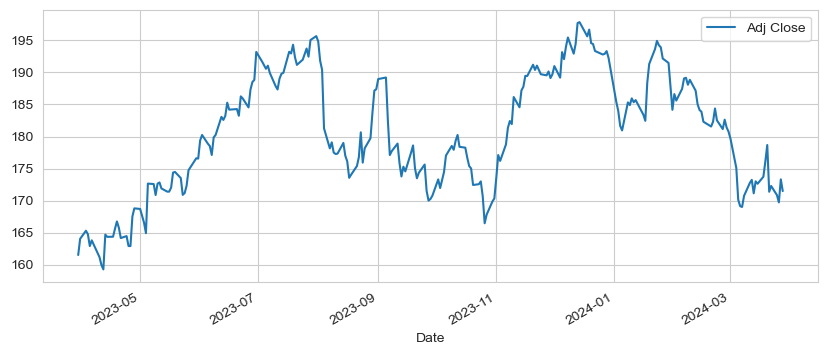

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

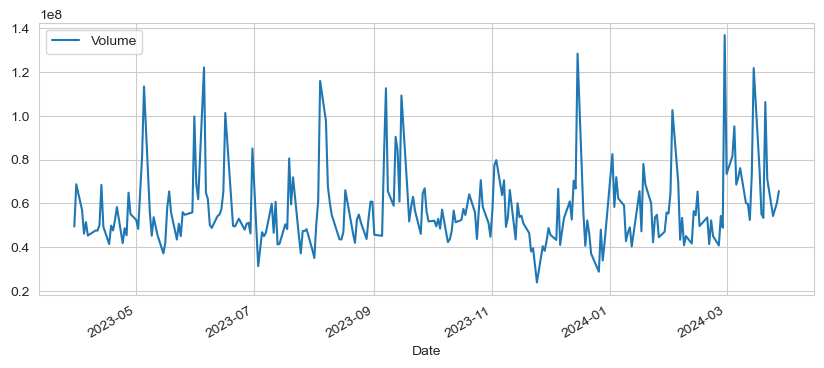

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
ma_days=[10,20,30,50]

for ma in ma_days:
    column_name='MA for %s days' %(str(ma))
    AAPL[column_name]=pd.Series.rolling(AAPL['Adj Close'],window=ma).mean()

<Axes: xlabel='Date'>

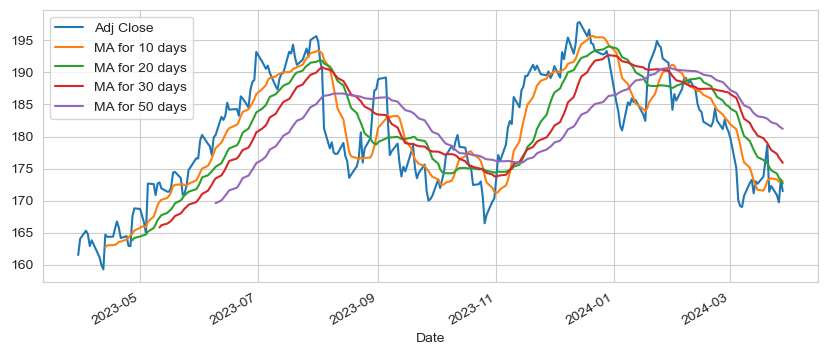

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

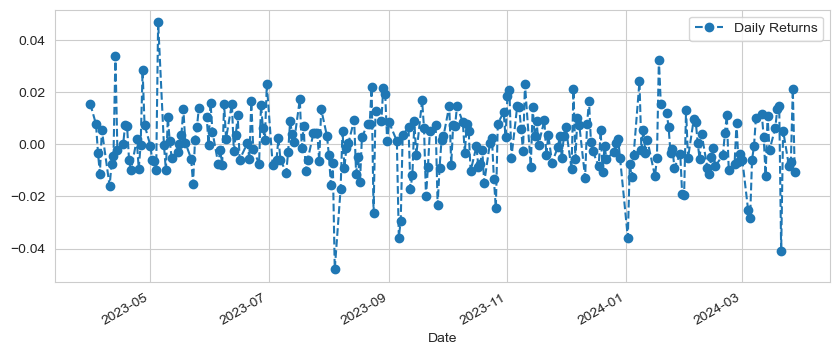

In [12]:
AAPL['Daily Returns']=AAPL['Adj Close'].pct_change()

AAPL['Daily Returns'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Returns', ylabel='Count'>

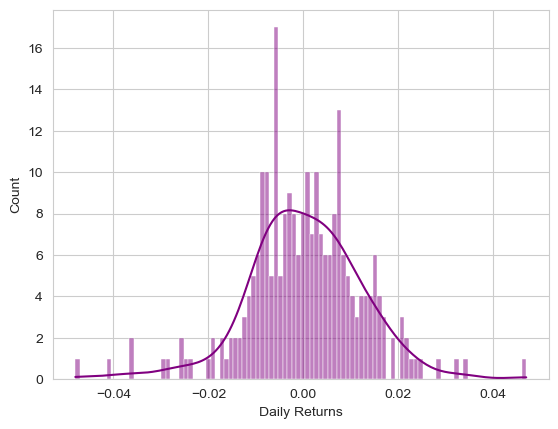

In [13]:
sns.histplot(AAPL['Daily Returns'].dropna(),kde=True,bins=100,color='purple')

<Axes: >

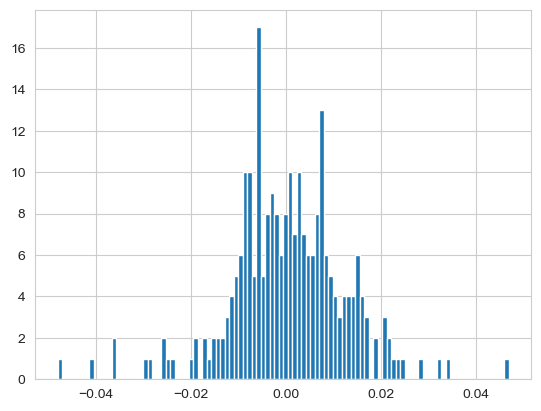

In [14]:
AAPL['Daily Returns'].hist(bins=100)

In [15]:
closing_df=dr=yf.download(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [16]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-30,161.497971,102.000000,101.320000,281.737671
2023-03-31,164.024490,103.290001,104.000000,285.953094
2023-04-03,165.287750,102.410004,104.910004,284.891815
2023-04-04,164.750626,103.949997,105.120003,284.842194
2023-04-05,162.890549,101.099998,104.949997,282.025330


In [17]:
tech_rets=closing_df.pct_change()

In [18]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-30,NaN,NaN,NaN,NaN
2023-03-31,0.015644,0.012647,0.026451,0.014962
2023-04-03,0.007702,-0.008520,0.008750,-0.003711
2023-04-04,-0.003250,0.015038,0.002002,-0.000174
2023-04-05,-0.011290,-0.027417,-0.001617,-0.009889


c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


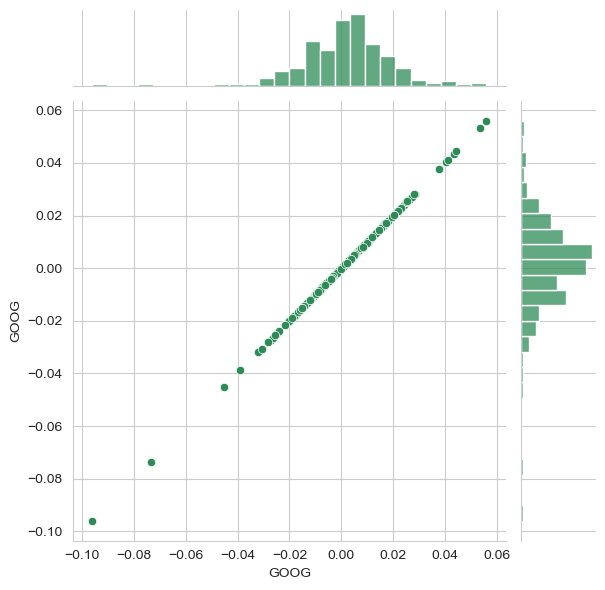

In [19]:
sns.jointplot(tech_rets,x='GOOG',y='GOOG',kind='scatter',color='seagreen')

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


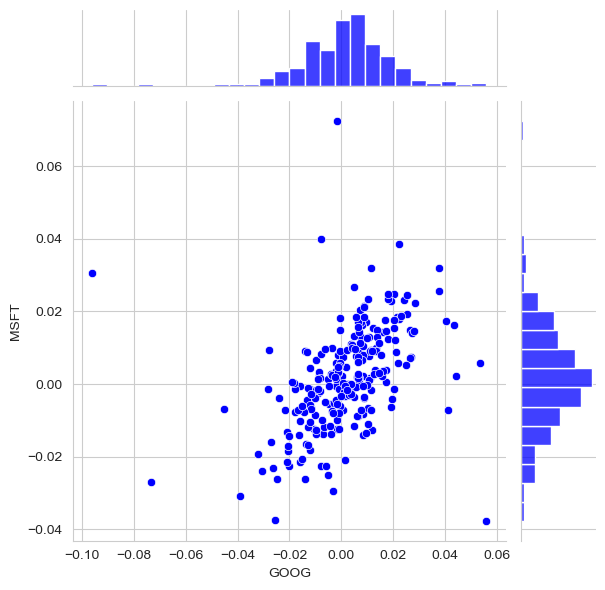

In [20]:
sns.jointplot(tech_rets,x='GOOG',y='MSFT',kind='scatter',color='blue')

In [21]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-30,NaN,NaN,NaN,NaN
2023-03-31,0.015644,0.012647,0.026451,0.014962
2023-04-03,0.007702,-0.008520,0.008750,-0.003711
2023-04-04,-0.003250,0.015038,0.002002,-0.000174
2023-04-05,-0.011290,-0.027417,-0.001617,-0.009889


c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

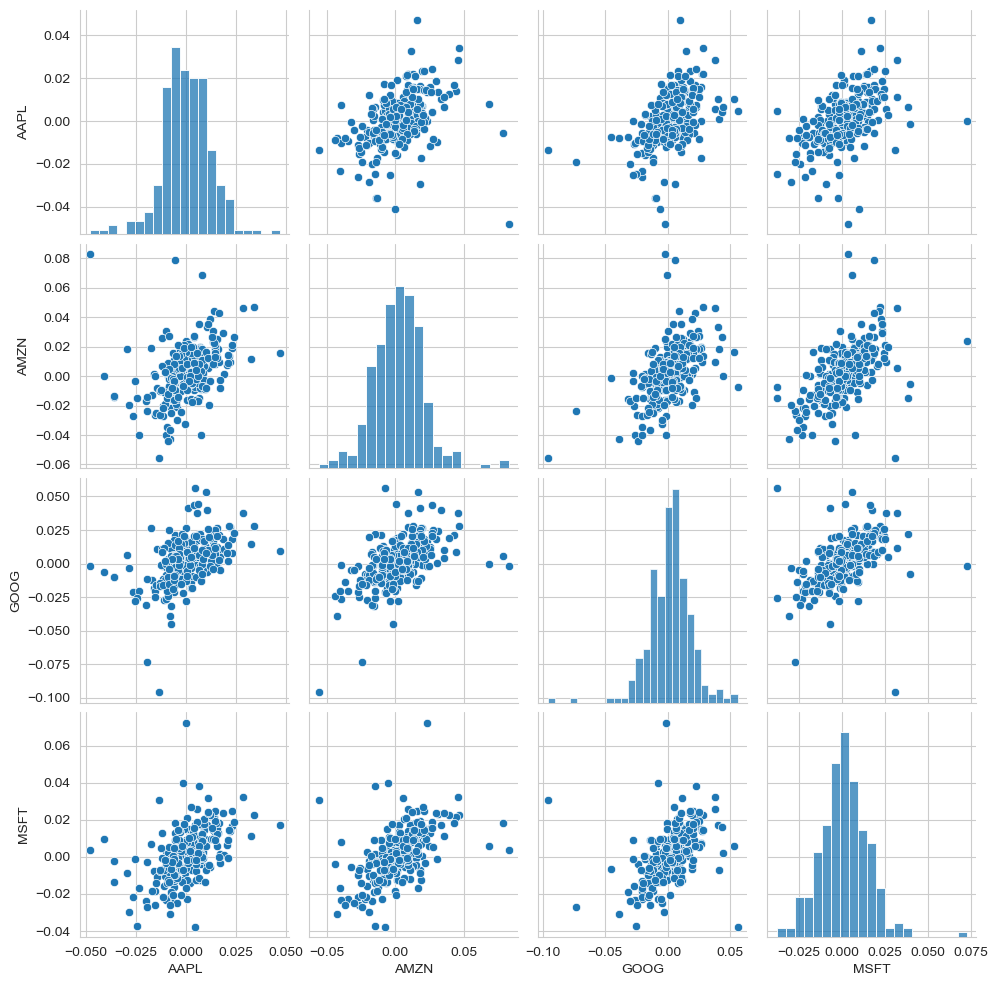

In [22]:
sns.pairplot(tech_rets.dropna())

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

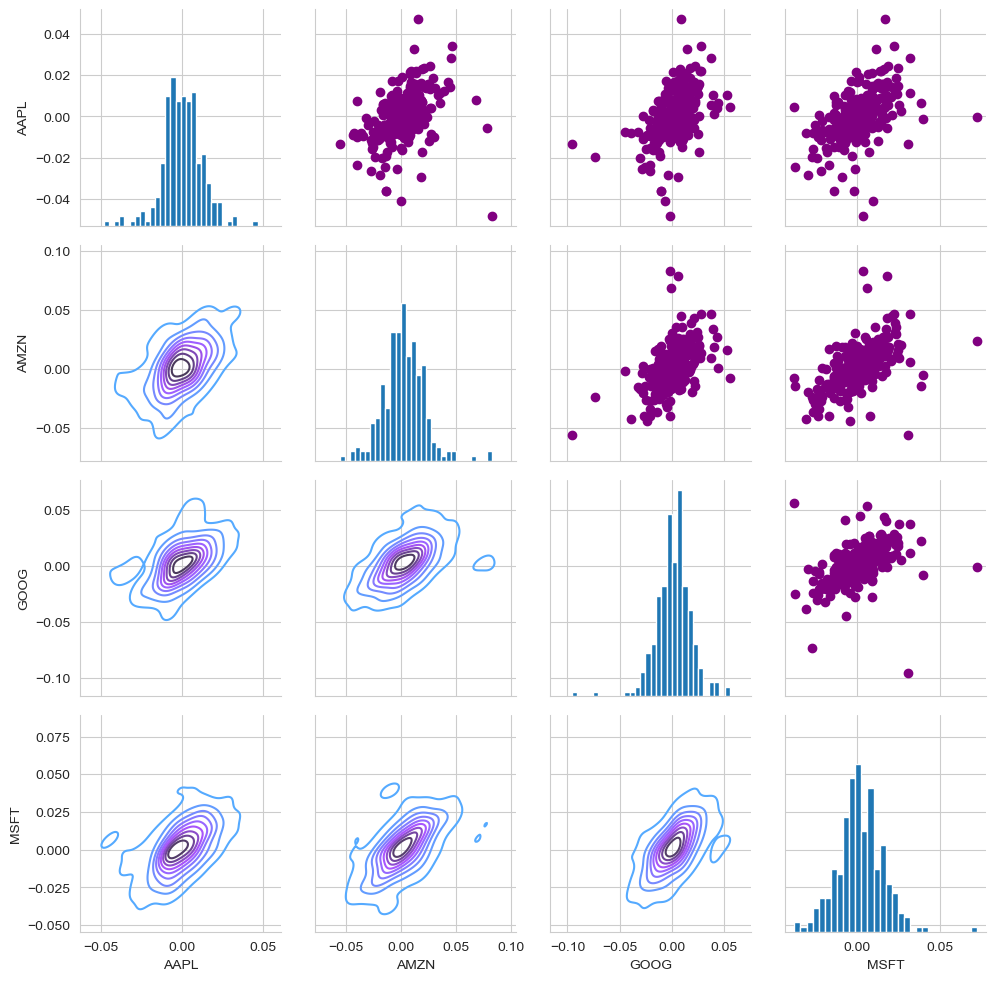

In [23]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

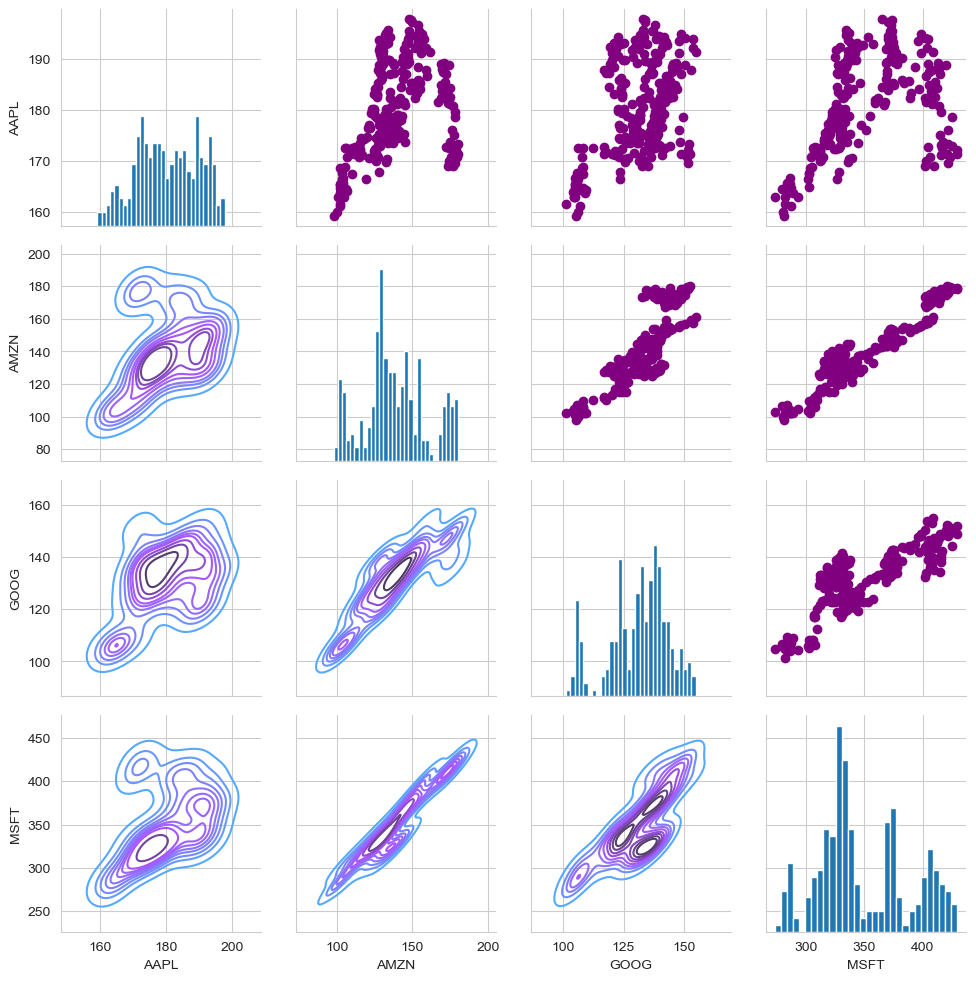

In [24]:
returns_fig=sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

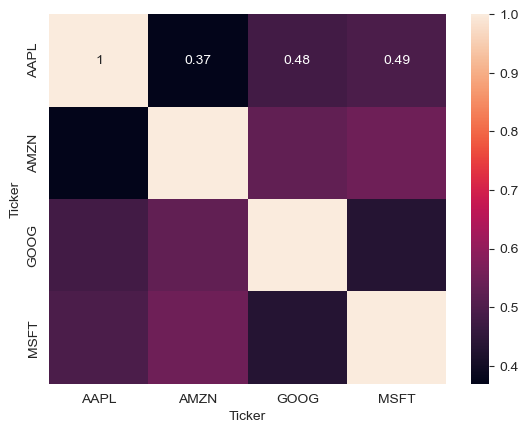

In [25]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

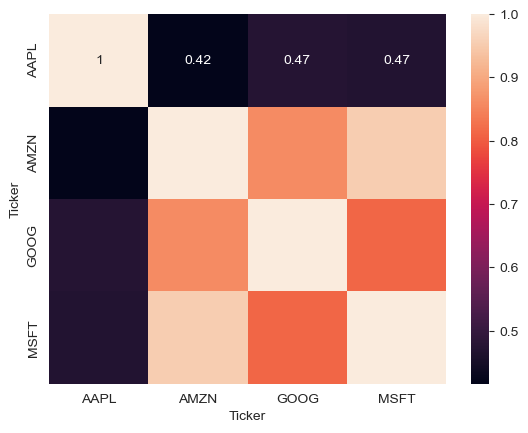

In [26]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

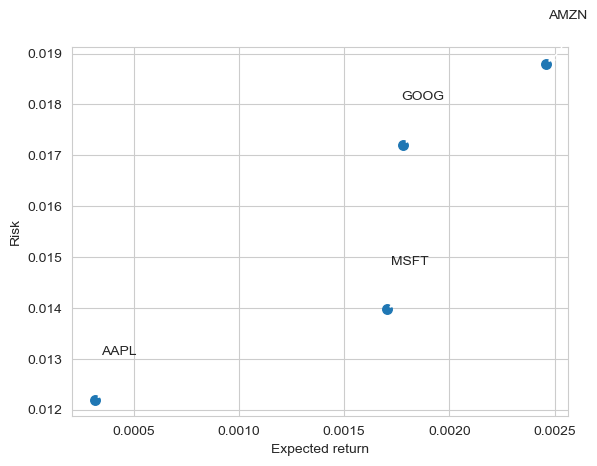

In [27]:
rets=tech_rets.dropna()

area=np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30,30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Returns', ylabel='Count'>

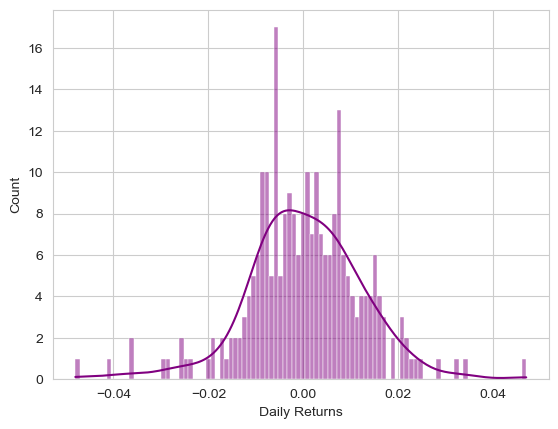

In [28]:
sns.histplot(AAPL['Daily Returns'],kde=True, bins=100, color='purple')

In [29]:
rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-31,0.015644,0.012647,0.026451,0.014962
2023-04-03,0.007702,-0.008520,0.008750,-0.003711
2023-04-04,-0.003250,0.015038,0.002002,-0.000174
2023-04-05,-0.011290,-0.027417,-0.001617,-0.009889
2023-04-06,0.005496,0.009496,0.037637,0.025533


In [30]:
rets['AAPL'].quantile(0.05)

-0.018349315886406217

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

In [31]:
#monte carlo method

days=365
dt = float(1)/365
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [32]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [33]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-30,101.440002,101.610001,100.290001,101.320000,101.320000,25009800
2023-03-31,101.709999,104.190002,101.440002,104.000000,104.000000,28108000
2023-04-03,102.669998,104.949997,102.379997,104.910004,104.910004,20719900
2023-04-04,104.839996,106.099998,104.599998,105.120003,105.120003,20377200
2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200


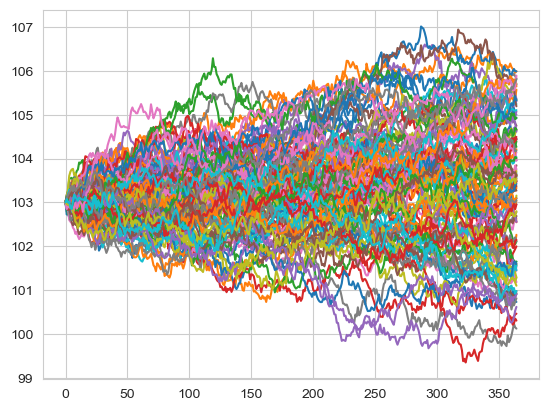

In [34]:
start_price = 103.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

In [35]:
runs=10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

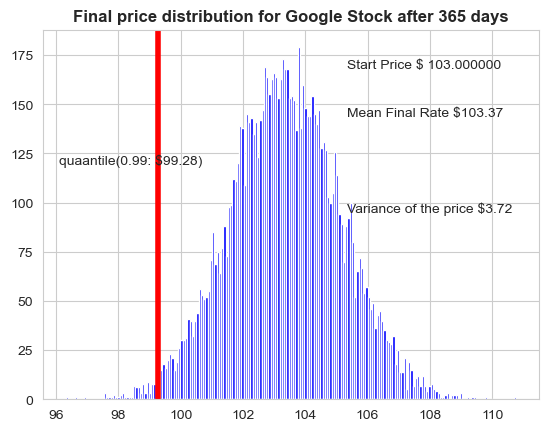

In [36]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q=np.percentile(simulations,1)
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200,color='blue')
# Using plt.figtext to fill in some additional information onto the plot
# Starting Price

plt.figtext(0.6,0.8,s='Start Price $% 2f' %start_price)

#ending rate
plt.figtext(0.6,0.7,'Mean Final Rate $%.2f' %simulations.mean() )

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.5,'Variance of the price $%.2f' %(start_price-q))

# Display 1% quantile
plt.figtext(0.15,0.6,"quaantile(0.99: $%.2f)" % q)

#line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');